In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
train=pd.read_csv('Downloads/Telegram Desktop/Movie_collection_train.csv')

In [3]:
train.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,PG,458,NO
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_ Actor_Rating   400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Time_taken           392 non-null    float64
 13  Twitter_hastags      400 non-null    float64
 14  Genre                400 non-null    object 
 15  Avg_age_actors       400 non-null    int

### removing all null values

In [5]:
train.dropna(axis=0,inplace=True)

In [6]:
Label_encoder=preprocessing.LabelEncoder()
train['Genre']=Label_encoder.fit_transform(train['Genre'])
train['MPAA_film_rating']=Label_encoder.fit_transform(train['MPAA_film_rating'])
train['3D_available']=Label_encoder.fit_transform(train['3D_available'])

In [7]:
train.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,3,23,0,494,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,2,42,0,462,0
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,1,38,0,458,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,2,45,0,472,1
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,2,55,0,395,0


In [68]:
 train.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

In [9]:
np.any(np.isnan(train))

False

### cleaning the data 

In [10]:
import seaborn as sns

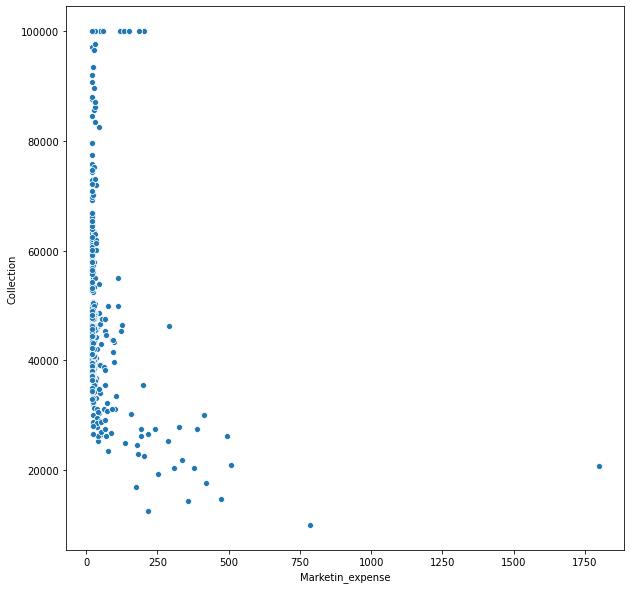

In [11]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train['Marketin_expense'],y=train['Collection'])

In [12]:
a=train.loc[train['Marketin_expense'] > 1750].index
print(a)
train.drop(a , inplace=True)

Int64Index([380], dtype='int64')


In [13]:
a=train.loc[train['Time_taken'] < 10].index
print(a)
train.drop(a , inplace=True)

Int64Index([50, 112], dtype='int64')


In [14]:
a=train.loc[train['Twitter_hastags'] > 1750].index
print(a)
train.drop(a , inplace=True)

Int64Index([2], dtype='int64')


In [15]:
a=train.loc[train['Avg_age_actors'] < 10].index
print(a)
train.drop(a , inplace=True)

Int64Index([213], dtype='int64')


### linear regression 

In [16]:
import statsmodels.api as sn

In [17]:
train.corr()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
Collection,1.000000,-0.311137,-0.374303,0.307508,0.757627,-0.274325,-0.109951,-0.108038,-0.104731,-0.110848,0.311710,0.675630,0.142066,0.028597,0.080137,-0.006854,NaN,-0.278913,0.205188
Marketin_expense,-0.311137,1.000000,0.443217,-0.486883,-0.294378,0.377598,0.408217,0.407671,0.406975,0.406649,-0.165495,-0.504050,0.029215,0.104943,-0.069005,0.011720,NaN,0.421204,-0.140058
Production_expense,-0.374303,0.443217,1.000000,-0.748682,-0.411098,0.616595,0.671954,0.672933,0.671229,0.675515,-0.175089,-0.541073,0.015956,-0.073625,-0.081150,0.031094,NaN,0.694464,-0.089634
Multiplex_coverage,0.307508,-0.486883,-0.748682,1.000000,0.326576,-0.718573,-0.750822,-0.752389,-0.749848,-0.750632,0.070638,0.528940,0.042232,0.006869,0.034075,-0.085635,NaN,-0.913218,0.068434
Budget,0.757627,-0.294378,-0.411098,0.326576,1.000000,-0.236711,-0.179399,-0.173050,-0.172449,-0.174400,0.233612,0.633307,0.058759,0.010639,0.038375,-0.040175,NaN,-0.307174,0.172995
Movie_length,-0.274325,0.377598,0.616595,-0.718573,-0.236711,1.000000,0.723652,0.724794,0.724682,0.726156,-0.173945,-0.552340,-0.004577,-0.017356,-0.077370,0.058305,NaN,0.659510,0.013026
Lead_ Actor_Rating,-0.109951,0.408217,0.671954,-0.750822,-0.179399,0.723652,1.000000,0.998012,0.997846,0.994542,-0.097950,-0.415475,0.054784,0.002854,-0.022677,0.003081,NaN,0.686304,-0.011756
Lead_Actress_rating,-0.108038,0.407671,0.672933,-0.752389,-0.173050,0.724794,0.998012,1.000000,0.998230,0.994499,-0.093869,-0.414306,0.054683,0.001113,-0.027020,0.006808,NaN,0.687958,-0.009520
Director_rating,-0.104731,0.406975,0.671229,-0.749848,-0.172449,0.724682,0.997846,0.998230,1.000000,0.994770,-0.093152,-0.413846,0.052676,-0.001441,-0.026433,0.007649,NaN,0.687008,-0.007413
Producer_rating,-0.110848,0.406649,0.675515,-0.750632,-0.174400,0.726156,0.994542,0.994499,0.994770,1.000000,-0.095321,-0.418556,0.043770,-0.002710,-0.025038,0.006101,NaN,0.687804,-0.002982


In [19]:
X = sn.add_constant(train['Budget'])

In [21]:
lm = sn.OLS(train['Collection'],X).fit()

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Collection   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     518.8
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           2.46e-73
Time:                        07:34:42   Log-Likelihood:                -4184.6
No. Observations:                 387   AIC:                             8373.
Df Residuals:                     385   BIC:                             8381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.085e+04   5288.640    -13.397      0.000   -8.13e+04   -6.05e+04
Budget         3.3978      0.149     22.776      0.000       3.105       3.691
==============================================================================
Omnibus:                      161.387   Durbin-Watson:                   0.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1496.591
Skew:                           1.503   Prob(JB):                         0.00
Kurtosis:                      12.153   Cond. No.                     3.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### LR using sklearn 

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
y=train['Collection']
x=train[['Budget']]

In [25]:
lm2=LinearRegression()

In [26]:
lm2.fit(x,y)

LinearRegression()

In [27]:
print(lm2.intercept_,lm2.coef_)

-70853.99360283726 [3.39783195]


In [28]:
lm2.predict(x)

array([53248.84534427, 50342.10204422, 61232.95194118, 64045.32045876,
       50511.97665266, 42622.24483823, 45642.23787725, 35430.88641407,
       42471.24518628, 49511.60395849, 42565.61996875, 40300.62518949,
       41433.12257912, 44207.74118372, 39262.50258233, 41168.87318821,
       42206.99579537, 32127.76902765, 37242.88223748, 41735.12188302,
       45075.98918243, 38866.12849595, 40961.24866677, 34826.88780627,
       38866.12849595, 43282.86831552, 51738.84882477, 55117.46603717,
       36978.63284657, 43754.74222786, 41451.99753561, 36752.13336864,
       44207.74118372, 41131.12327522, 39394.62727778, 39564.50188623,
       41753.99683951, 53626.34447415, 61723.70081002, 56929.46186058,
       45585.61300777, 46378.36118051, 43698.11735838, 36393.50919526,
       38356.50467062, 42961.99405512, 31051.8965075 , 34883.51267575,
       44566.3653571 , 52040.84812867, 42357.99544732, 40281.75023299,
       65970.56602113, 49624.85369745, 57797.70985929, 41017.87353625,
      

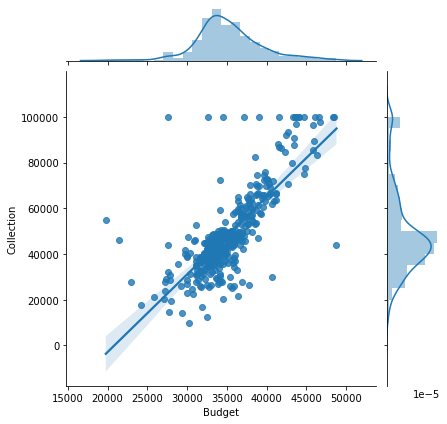

In [29]:
sns.jointplot(x=train["Budget"], y = train["Collection"], data =train, kind = 'reg')

In [30]:
x_multi = train.drop("Collection",axis = 1)
y_multi = train["Collection"]

In [31]:
x_multi_cons = sn.add_constant(x_multi)

In [32]:
x_multi_cons.head()

,const,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,1.0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,3,23,0,494,1
1,1.0,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,2,42,0,462,0
3,1.0,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,2,45,0,472,1
4,1.0,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,2,55,0,395,0
5,1.0,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,143.48,284.592,1,53,0,460,1


In [34]:
lm_multi = sn.OLS(y_multi, x_multi_cons).fit()

In [35]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Collection   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     49.28
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           6.29e-84
Time:                        07:40:03   Log-Likelihood:                -4120.4
No. Observations:                 387   AIC:                             8277.
Df Residuals:                     369   BIC:                             8348.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.569e+05   1.96e+04     -8.009      0.000   -1.95e+05   -1.18e+05
Marketin_expense        2.3630      8.046      0.294      0.769     -13.458      18.184
Production_expense    -55.8908     68.096     -0.821      0.412    -189.796      78.014
Multiplex_coverage   2.513e+04   1.38e+04      1.819      0.070   -2032.508    5.23e+04
Budget                  2.1931      0.180     12.171      0.000       1.839       2.547
Movie_length          -31.4706     31.213     -1.008      0.314     -92.849      29.908
Lead_ Actor_Rating   7350.4362   8899.038      0.826      0.409   -1.01e+04    2.48e+04
Lead_Actress_rating -1.253e+04   9564.168     -1.310      0.191   -3.13e+04    6274.082
Director_rating      1.099e+04   9335.141      1.177      0.240   -7371.382    2.93e+04
Producer_rating     -1789.5365   5083.182     -0.352      0.725   -1.18e+04    8206.103
Critic_rating        3709.3139    846.492      4.382      0.000    2044.760    5373.868
Trailer_views           0.0962      0.013      7.245      0.000       0.070       0.122
Time_taken             44.1078     18.347      2.404      0.017       8.030      80.185
Twitter_hastags         8.0427     16.221      0.496      0.620     -23.855      39.941
Genre                 446.5266    500.291      0.893      0.373    -537.253    1430.306
Avg_age_actors         43.0557     43.323      0.994      0.321     -42.135     128.246
MPAA_film_rating     1.537e-11   1.05e-11      1.469      0.143   -5.21e-12    3.59e-11
Num_multiplex          17.1915     12.808      1.342      0.180      -7.994      42.377
3D_available         2821.6334   1103.743      2.556      0.011     651.217    4992.049
==============================================================================
Omnibus:                      132.911   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.384
Skew:                           1.410   Prob(JB):                    7.10e-136
Kurtosis:                       8.536   Cond. No.                     1.35e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.67e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
lm3 = LinearRegression()

In [37]:
lm3.fit(x_multi,y_multi)

LinearRegression()

In [38]:
print(lm3.intercept_,lm3.coef_) #(beta0, beta1... beta n)

-156879.177331345 [ 2.36298988e+00 -5.58907867e+01  2.51273769e+04  2.19313988e+00
 -3.14706267e+01  7.35043624e+03 -1.25330288e+04  1.09853660e+04
 -1.78953648e+03  3.70931391e+03  9.61944320e-02  4.41078155e+01
  8.04267318e+00  4.46526554e+02  4.30556909e+01 -5.45696821e-12
  1.71914650e+01  2.82163345e+03]


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x_multi,y_multi, test_size = 0.2, random_state = 0)

In [42]:
print(x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape)

(309, 18) (78, 18) (309,) (78,)


In [43]:
lm_a =LinearRegression()

In [44]:
lm_a.fit(x_train,y_train)

LinearRegression()

In [45]:
y_test_a = lm_a.predict(x_test)

In [46]:
y_train_a = lm_a.predict(x_train)

In [47]:
from sklearn.metrics import r2_score #r2_score? will help to know with documentation

In [48]:
r2_score(y_test,y_test_a)

0.6865216508805929

In [49]:
r2_score(y_train,y_train_a)

0.6895867171169316

In [50]:
from sklearn import preprocessing 

In [51]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [52]:
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [59]:
from sklearn.linear_model import Ridge

In [54]:
lm_r = Ridge(alpha = 0.5)
lm_r.fit(x_train_s,y_train)

Ridge(alpha=0.5)

In [55]:
r2_score(y_test, lm_r.predict(x_test_s))

0.688225568978841

### Hyper parameter tuning for different values of lambda.

In [60]:
from sklearn.model_selection import validation_curve

In [62]:
param_range = np.logspace(-2,8,100) #100 values from 10^-2 to 10^8 
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [63]:
train_scores, test_scores = validation_curve (Ridge(),x_train,y_train,"alpha",param_range, scoring= 'r2')

C:\Users\amraa\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.722

In [64]:
print(train_scores)
print(test_scores)

[[0.6606217  0.70538987 0.71764364 0.69849272 0.69663423]
 [0.66061921 0.70538832 0.71764187 0.69849085 0.69663236]
 [0.66061531 0.7053859  0.71763911 0.69848795 0.69662943]
 [0.66060929 0.70538214 0.71763483 0.69848345 0.69662489]
 [0.66060001 0.70537636 0.71762825 0.69847652 0.69661789]
 [0.66058587 0.70536751 0.7176182  0.69846596 0.69660715]
 [0.66056452 0.7053541  0.71760304 0.69845001 0.69659086]
 [0.66053267 0.70533402 0.71758042 0.69842622 0.69656642]
 [0.66048589 0.70530439 0.71754719 0.69839127 0.69653023]
 [0.66041838 0.70526138 0.71749921 0.69834081 0.6964775 ]
 [0.66032298 0.70520018 0.71743138 0.69826946 0.69640213]
 [0.66019136 0.7051151  0.71733774 0.69817095 0.69629669]
 [0.6600147  0.70499992 0.71721194 0.6980386  0.69615283]
 [0.65978477 0.70484858 0.71704802 0.69786612 0.69596192]
 [0.65949539 0.70465616 0.7168414  0.6976487  0.69571621]
 [0.65914406 0.70442009 0.71659002 0.69738424 0.69541012]
 [0.65873329 0.70414113 0.71629532 0.69707435 0.69504167]
 [0.65827119 0

In [65]:
train_mean = np.mean(train_scores, axis =1)
train_mean

array([0.69575643, 0.69575452, 0.69575154, 0.69574692, 0.69573981,
       0.69572894, 0.69571251, 0.69568795, 0.69565179, 0.69559946,
       0.69552522, 0.69542237, 0.6952836 , 0.69510188, 0.69487157,
       0.6945897 , 0.69425715, 0.69387922, 0.69346545, 0.69302851,
       0.69258255, 0.69214136, 0.69171669, 0.69131729, 0.69094839,
       0.69061168, 0.69030548, 0.6900249 , 0.68976192, 0.68950515,
       0.68923959, 0.68894615, 0.68860143, 0.68817784, 0.68764448,
       0.68696899, 0.68612041, 0.6850727 , 0.68380821, 0.6823201 ,
       0.68061312, 0.67870267, 0.67661265, 0.67437353, 0.67202114,
       0.6695965 , 0.66714566, 0.66471854, 0.66236604, 0.66013578,
       0.65806764, 0.65619035, 0.65451992, 0.65306005, 0.65180412,
       0.65073781, 0.64984189, 0.64909467, 0.64847385, 0.6479577 ,
       0.64752581, 0.64715936, 0.64684109, 0.64655502, 0.64628605,
       0.64601952, 0.64574077, 0.64543499, 0.64508738, 0.64468384,
       0.64421231, 0.64366429, 0.64303651, 0.64233184, 0.64155

In [66]:
#Lets see the improvemnt in r2 score
test_mean = np.mean(test_scores, axis =1)
max(test_mean)

0.6185760885254797

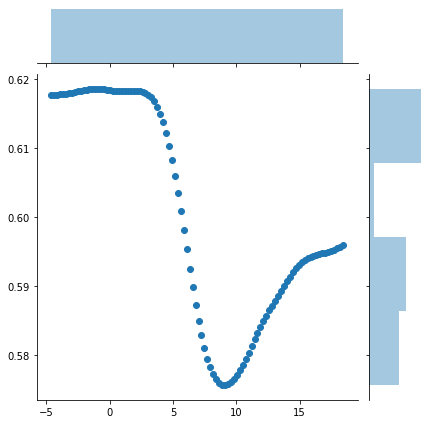

In [67]:
sns.jointplot(x=np.log(param_range), y = test_mean)